In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("city_day.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'city_day.csv'

In [3]:
import os
import pandas as pd

# Read the original CSV file
original_data = pd.read_csv('city_day.csv')

# Get unique cities from the 'City' column
unique_cities = original_data['City'].unique()

# Create a folder to store the city-specific CSV files
output_folder = '/content/drive/MyDrive/Colab Notebooks/city_data_files'
os.makedirs(output_folder, exist_ok=True)

# Loop through each city and save its data to a separate CSV file
for city in unique_cities:
    city_data = original_data[original_data['City'] == city]

    # Create a folder with the same name as the main file (city_day.csv)
    city_folder = os.path.join(output_folder, 'city_day')
    os.makedirs(city_folder, exist_ok=True)

    # Save the city-specific data to a CSV file within the city folder
    city_data.to_csv(os.path.join(city_folder, f'{city}_data.csv'), index=False)

print("CSV files created for each city in the 'main_file' folder.")


FileNotFoundError: [Errno 2] No such file or directory: 'city_day.csv'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/city_data_files/city_day/Delhi_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/city_data_files/city_day/Delhi_data.csv'

In [4]:
df = pd.read_csv("Delhi_data.csv")
nan_counts = df.isna().sum()

# Display the result
print("Total NaN values in each column:")
print(nan_counts)
df["AQI"]

Total NaN values in each column:
City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64


0       472.0
1       454.0
2       143.0
3       319.0
4       325.0
        ...  
2004    112.0
2005    196.0
2006    233.0
2007    114.0
2008    101.0
Name: AQI, Length: 2009, dtype: float64

In [5]:
from datetime import datetime, timedelta

date_range = pd.date_range(start='2015-01-01', end='2020-07-01', freq='D')
aqi_values = df["AQI"]

df = pd.DataFrame({'Date': date_range, 'AQI': aqi_values})
df.set_index('Date', inplace=True)

print(df)

              AQI
Date             
2015-01-01  472.0
2015-01-02  454.0
2015-01-03  143.0
2015-01-04  319.0
2015-01-05  325.0
...           ...
2020-06-27  112.0
2020-06-28  196.0
2020-06-29  233.0
2020-06-30  114.0
2020-07-01  101.0

[2009 rows x 1 columns]


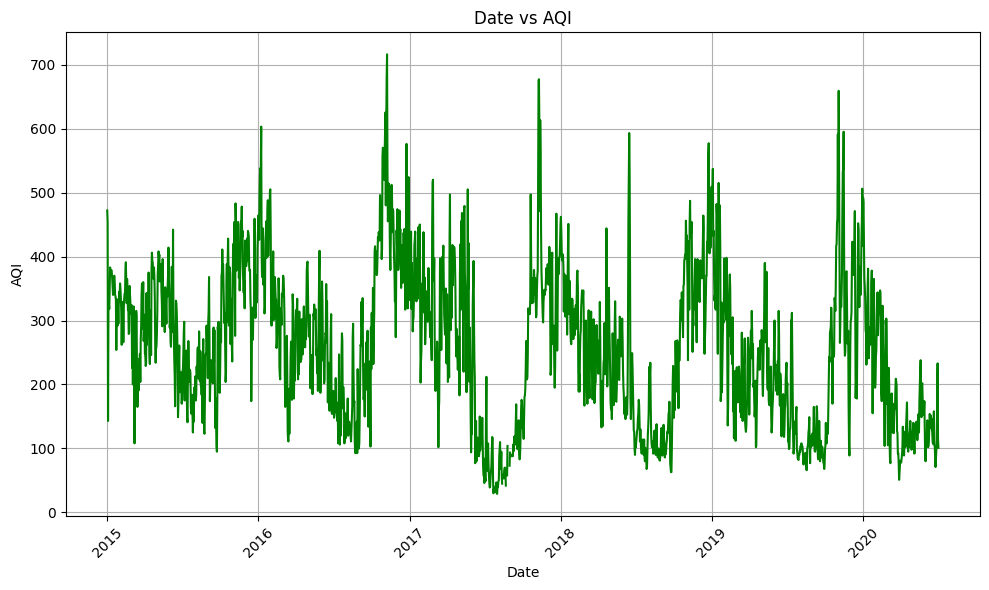

In [6]:
import matplotlib.pyplot as plt

# Plot Date vs AQI
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AQI'], linestyle='-', color='g')
plt.title('Date vs AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# time series imputation


In [7]:
# Check for duplicate dates
duplicate_dates = df[df.index.duplicated(keep=False)]
print(duplicate_dates)
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [AQI]
Index: []
            AQI
Date           
2016-07-24  NaN
2017-06-23  NaN
2017-08-13  NaN
2017-08-14  NaN
2017-08-22  NaN
2017-08-23  NaN
2017-08-26  NaN
2017-08-27  NaN
2017-08-28  NaN
2017-08-29  NaN


In [8]:

df_t = df.interpolate(method='time')

df_l = df.interpolate(method='linear')

df_c = df.interpolate(method='spline', order = 3)
print("interpolation using time method:")
print(df_t['2017-08-13':'2017-08-29'])
print("interpolation using linear method:")
print(df_l['2017-08-13':'2017-08-29'])
print("interpolation using cubic spline method:")
print(df_c['2017-08-13':'2017-08-29'])

interpolation using time method:
                   AQI
Date                  
2017-08-13   49.666667
2017-08-14   54.333333
2017-08-15   59.000000
2017-08-16   53.000000
2017-08-17   66.000000
2017-08-18   70.000000
2017-08-19   70.000000
2017-08-20   63.000000
2017-08-21   42.000000
2017-08-22   47.333333
2017-08-23   52.666667
2017-08-24   58.000000
2017-08-25  104.000000
2017-08-26   97.800000
2017-08-27   91.600000
2017-08-28   85.400000
2017-08-29   79.200000
interpolation using linear method:
                   AQI
Date                  
2017-08-13   49.666667
2017-08-14   54.333333
2017-08-15   59.000000
2017-08-16   53.000000
2017-08-17   66.000000
2017-08-18   70.000000
2017-08-19   70.000000
2017-08-20   63.000000
2017-08-21   42.000000
2017-08-22   47.333333
2017-08-23   52.666667
2017-08-24   58.000000
2017-08-25  104.000000
2017-08-26   97.800000
2017-08-27   91.600000
2017-08-28   85.400000
2017-08-29   79.200000
interpolation using cubic spline method:
                 

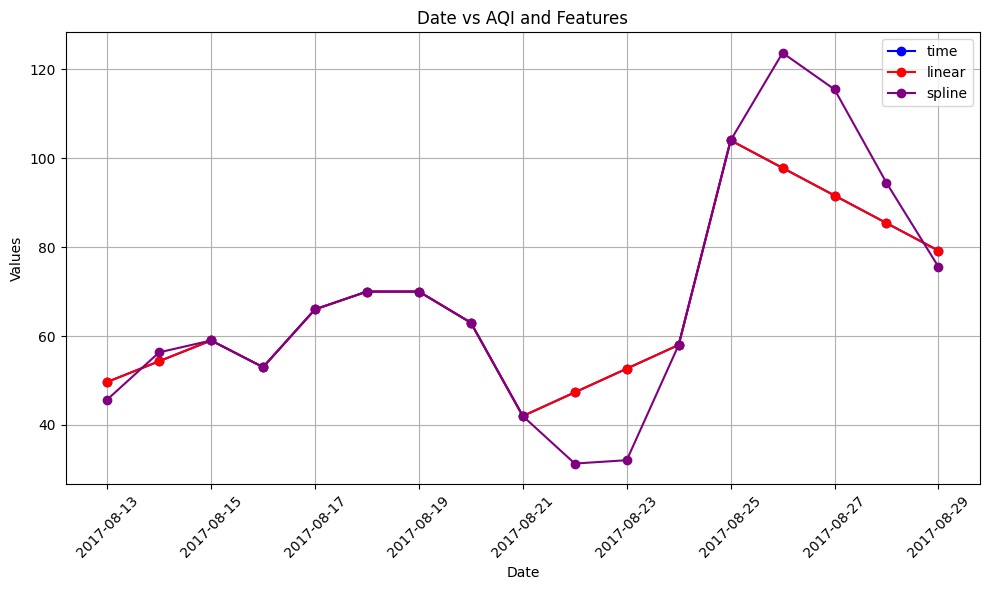

In [9]:
import matplotlib.pyplot as plt

dfs1 = df_t['2017-08-13':'2017-08-29']
dfs2 = df_l['2017-08-13':'2017-08-29']
dfs3 = df_c['2017-08-13':'2017-08-29']

plt.figure(figsize=(10, 6))
plt.plot(dfs1.index, dfs1['AQI'], linestyle='-', color='b', marker='o', label='time')

plt.plot(dfs2.index, dfs2['AQI'], linestyle='-', color='r', marker='o', label='linear')

plt.plot(dfs3.index, dfs3['AQI'], linestyle='-', color='purple', marker='o', label='spline')

plt.title('Date vs AQI and Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
df = df_t

# train val test split


In [ ]:
df

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0
...,...
2020-06-27,112.0
2020-06-28,196.0
2020-06-29,233.0


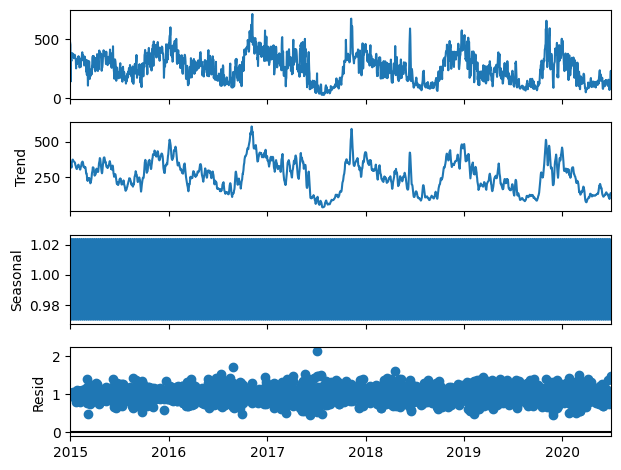

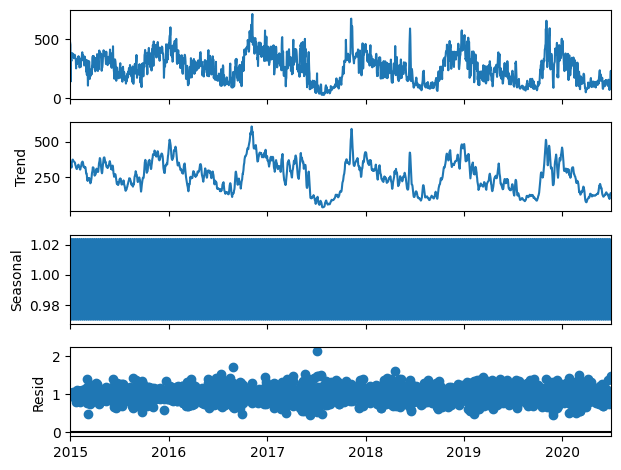

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = df
result = seasonal_decompose(series, model='multiplicative')
result.plot()



In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['AQI_scaled'] = scaler.fit_transform(df[['AQI']])
df

,AQI,AQI_scaled
Date,,
2015-01-01,472.0,0.644833
2015-01-02,454.0,0.618632
2015-01-03,143.0,0.165939
2015-01-04,319.0,0.422125
2015-01-05,325.0,0.430859
...,...,...
2020-06-27,112.0,0.120815
2020-06-28,196.0,0.243086
2020-06-29,233.0,0.296943


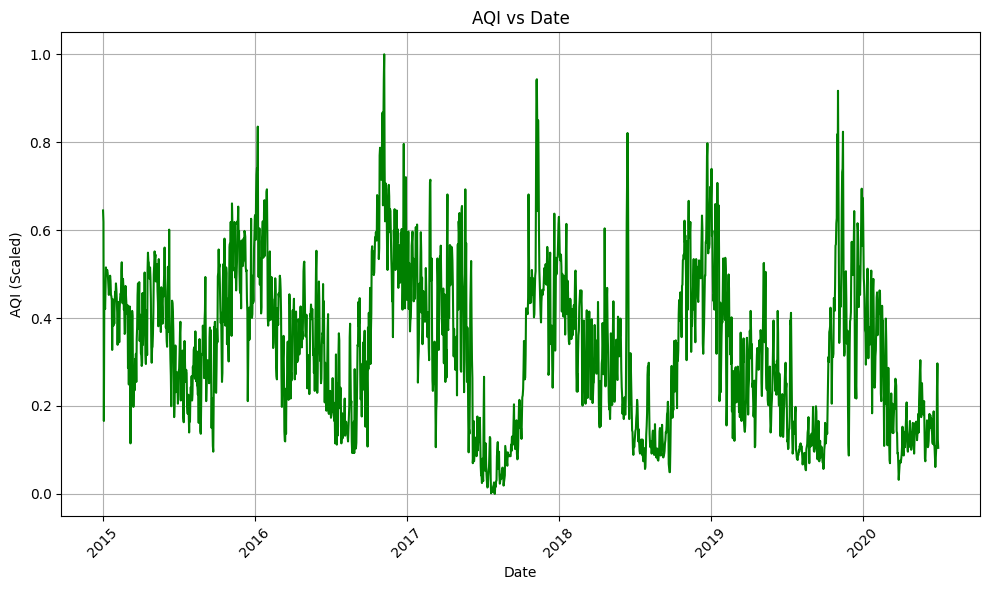

In [12]:
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AQI_scaled'], linestyle='-', color='g')
plt.title('AQI vs Date')
plt.xlabel('Date')
plt.ylabel('AQI (Scaled)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

    # Build and compile the model
model = Sequential([
        layers.Input(shape=(1, 1)),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu'),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
])

model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["mean_absolute_error"])
model.summary()
df


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30401 (118.75 KB)
Trainable params: 30401 (118.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


,AQI,AQI_scaled
Date,,
2015-01-01,472.0,0.644833
2015-01-02,454.0,0.618632
2015-01-03,143.0,0.165939
2015-01-04,319.0,0.422125
2015-01-05,325.0,0.430859
...,...,...
2020-06-27,112.0,0.120815
2020-06-28,196.0,0.243086
2020-06-29,233.0,0.296943


In [69]:
from sklearn.metrics import r2_score

n_splits = 5

tscv = TimeSeriesSplit(n_splits=n_splits)

# Iterate through splits to get indices for train, validation, and test sets
for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    #print("shape:", train_data.shape)

    # Further split the training set into training and validation
    split_tscv = TimeSeriesSplit(n_splits=2)
    for train_idx, val_idx in split_tscv.split(train_data):
        train_set = train_data.iloc[train_idx]
        val_set = train_data.iloc[val_idx]
        #print("shape:", train_set.shape)

        # Use train_set, val_set, and test_data for your model training and testing
        print(f"Training set size: {len(train_set)}, Validation set size: {len(val_set)}, Test set size: {len(test_data)}")
        X_train = train_set.index.to_series().astype(np.int64) // 10**9
        y_train = train_set['AQI_scaled']
        X_val = val_set.index.to_series().astype(np.int64) // 10**9
        y_val  = val_set['AQI_scaled']
        X_test = test_data.index.to_series().astype(np.int64) // 10**9
        y_test = test_data['AQI_scaled']

        X_train = np.reshape(X_train.values , (X_train.shape[0], 1, 1))
        X_val = np.reshape(X_val.values , (X_val.shape[0], 1, 1))
        X_test = np.reshape(X_test.values ,(X_test.shape[0], 1, 1))
        #print("shape:", X_train.shape)

        model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

        predictions = model.predict(X_test)
        #print(f"predition for this part is {predictions}")
        mse = mean_squared_error(y_test, predictions)
        print(f"Mean Squared Error on Test Set: {mse}")

Training set size: 113, Validation set size: 113, Test set size: 334
Epoch 1/10
4/4 [==============================] - 0s 34ms/step - loss: 38837.5977 - mean_absolute_error: 189.6123 - val_loss: 11.2674 - val_mean_absolute_error: 3.1889
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 10999.6807 - mean_absolute_error: 86.6693 - val_loss: 23943.4512 - val_mean_absolute_error: 154.7332
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 12325.3828 - mean_absolute_error: 100.0275 - val_loss: 1772.6292 - val_mean_absolute_error: 42.0898
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 7682.6929 - mean_absolute_error: 83.0185 - val_loss: 9625.5469 - val_mean_absolute_error: 98.1031
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 4460.0190 - mean_absolute_error: 58.1986 - val_loss: 1625.0303 - val_mean_absolute_error: 40.2951
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 3731.3826 -

In [68]:
X_train[1] , y_train[1]

(array([[1420156800]]), 0.6186317321688501)